In [1]:
%run ../includes/common-20230414.ipynb

CPython 2024-01-08T04:53:18.539251


CPU times: user 899 µs, sys: 0 ns, total: 899 µs
Wall time: 1.12 ms


# Prep

In [2]:
dfc_raw = get_df()

postproc failed


In [3]:
dfs_01 = get_data(dfc_raw, default_sample_ratio=.1, default_cl_o_ratio=.1, default_sc_ratio=.1)

9065


/tmp/ipykernel_43361/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)
/tmp/ipykernel_43361/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


# Checks

In [4]:
# reload(maps)
# df_ = filter_df(
#     dfs_1["exp"],
#     {
#         "RegionLabel": "Region2",
#         "CanonAP": True,
#         "DWPDClose": True,
#         "PracticalAP": True,
#     },
# )

# y = "P100ServiceTimeUtil@10m"
# hue = "ShortLabel"

In [5]:
dfc_raw[["RegionLabel", "SampleRatio"]].value_counts().sort_index()

RegionLabel        SampleRatio
Chlorine+Scandium  0.1             400
Region1            0.1            1900
                   1.0             640
Region2            0.1            1401
                   1.0             952
                   5.0             441
Region3            0.1             553
                   5.0             501
Region4            0.1            1546
                   1.0             957
Region5            0.1            1941
                   1.0             809
Region6            0.1            2299
                   1.0             866
Region7            0.1            1896
                   1.0             808
dtype: int64

In [6]:
dfs_01['exp'][["RegionLabel", "SampleRatio"]].value_counts().sort_index()

RegionLabel  SampleRatio
Region1      0.1            1729
Region2      0.1            1399
Region3      0.1             495
Region4      0.1            1391
Region5      0.1            1714
Region6      0.1            1710
Region7      0.1            1725
dtype: int64

# Plots

In [7]:
params =  {
        "DWPDClose": True,
        "PracticalAP": True,
        # "SampleRatio": 1,
        "ShortLabel": [
            "CoinFlip",
            "RejectX",
            "Baleen",
            "Baleen (No Prefetch)",
            # "Baleen (All on Partial Hit)",
            # "Baleen (ML-Range on Partial Hit)",
            # "Baleen (ML Prefetch)",
        ],
        #3.75,
        "Target Cache Size": ef.DEFAULT_CSIZE,
        "Target DWPD": [3.75, 7.5, 15.0, 20.0,17.5, 10.0, 12.5], # 3, 3.75,
    #1,3
}

df_01 = filter_df(dfs_01["exp"], params)

In [8]:
df_01f = fillright(sampleright(df_01, idx=['ShortLabel', 'Target Write Rate', 'Target DWPD']), idx=['ShortLabel', 'Target Write Rate', 'Target DWPD'], verbose=1)

Write Rate (MB/s)                                                                        DWPD                                                               IOPS Saved Ratio                                                             Service Time Saved Ratio                                                             SamplingRatio                                                 IOPSSavedRatio                                                             IOPSSavedOnlyRatio                                                 IOPSPartialHitsRatio                                                             ChunkHitRatio                                                             IOPSSavedAdmitBufferRatio                                                 IOPSSavedAdmitBufferOnlyRatio                                                 IOPSPartialHitsAdmitBufferRatio                                                 ChunkHitAdmitBufferRatio          \
Region                                                       Region1    Region2    Region3    Region4    Region5    Region6    Region7   Region1    Region2   Region3    Region4   Region5   Region6   Region7          Region1   Region2   Region3   Region4   Region5   Region6   Region7                  Region1   Region2   Region3   Region4   Region5   Region6   Region7       Region1 Region2 Region3 Region4 Region5 Region6 Region7        Region1   Region2   Region3   Region4   Region5   Region6   Region7            Region1 Region2 Region3 Region4 Region5 Region6 Region7              Region1   Region2   Region3   Region4   Region5   Region6   Region7       Region1   Region2   Region3   Region4   Region5   Region6   Region7                   Region1 Region2 Region3 Region4 Region5 Region6 Region7                       Region1 Region2 Region3 Region4 Region5 Region6 Region7                         Region1 Region2 Region3 Region4 Region5 Region6 Region7                  Region1 Region2   
RegionLabel                                                  Region1    Region2    Region3    Region4    Region5    Region6    Region7   Region1    Region2   Region3    Region4   Region5   Region6   Region7          Region1   Region2   Region3   Region4   Region5   Region6   Region7                  Region1   Region2   Region3   Region4   Region5   Region6   Region7       Region1 Region2 Region3 Region4 Region5 Region6 Region7        Region1   Region2   Region3   Region4   Region5   Region6   Region7            Region1 Region2 Region3 Region4 Region5 Region6 Region7              Region1   Region2   Region3   Region4   Region5   Region6   Region7       Region1   Region2   Region3   Region4   Region5   Region6   Region7                   Region1 Region2 Region3 Region4 Region5 Region6 Region7                       Region1 Region2 Region3 Region4 Region5 Region6 Region7                         Region1 Region2 Region3 Region4 Region5 Region6 Region7                  Region1 Region2   
ShortLabel           Target Write Rate Target DWPD                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
Baleen               17.800            3.75                17.87018

Write Rate (MB/s)                                                                        DWPD                                                               IOPS Saved Ratio                                                             Service Time Saved Ratio                                                             SamplingRatio                                                 IOPSSavedRatio                                                             IOPSSavedOnlyRatio                                                 IOPSPartialHitsRatio                                                             ChunkHitRatio                                                             IOPSSavedAdmitBufferRatio                                                 IOPSSavedAdmitBufferOnlyRatio                                                 IOPSPartialHitsAdmitBufferRatio                                                 ChunkHitAdmitBufferRatio          \
Region                                                       Region1    Region2    Region3    Region4    Region5    Region6    Region7   Region1    Region2   Region3    Region4   Region5   Region6   Region7          Region1   Region2   Region3   Region4   Region5   Region6   Region7                  Region1   Region2   Region3   Region4   Region5   Region6   Region7       Region1 Region2 Region3 Region4 Region5 Region6 Region7        Region1   Region2   Region3   Region4   Region5   Region6   Region7            Region1 Region2 Region3 Region4 Region5 Region6 Region7              Region1   Region2   Region3   Region4   Region5   Region6   Region7       Region1   Region2   Region3   Region4   Region5   Region6   Region7                   Region1 Region2 Region3 Region4 Region5 Region6 Region7                       Region1 Region2 Region3 Region4 Region5 Region6 Region7                         Region1 Region2 Region3 Region4 Region5 Region6 Region7                  Region1 Region2   
RegionLabel                                                  Region1    Region2    Region3    Region4    Region5    Region6    Region7   Region1    Region2   Region3    Region4   Region5   Region6   Region7          Region1   Region2   Region3   Region4   Region5   Region6   Region7                  Region1   Region2   Region3   Region4   Region5   Region6   Region7       Region1 Region2 Region3 Region4 Region5 Region6 Region7        Region1   Region2   Region3   Region4   Region5   Region6   Region7            Region1 Region2 Region3 Region4 Region5 Region6 Region7              Region1   Region2   Region3   Region4   Region5   Region6   Region7       Region1   Region2   Region3   Region4   Region5   Region6   Region7                   Region1 Region2 Region3 Region4 Region5 Region6 Region7                       Region1 Region2 Region3 Region4 Region5 Region6 Region7                         Region1 Region2 Region3 Region4 Region5 Region6 Region7                  Region1 Region2   
ShortLabel           Target Write Rate Target DWPD                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
Baleen               17.800            3.75                17.87018

In [9]:
dfs_01["exp"].groupby(["Region", "SampleRatio"])["Region"].count()

Region   SampleRatio
Region1  0.1            1729
Region2  0.1            1399
Region3  0.1             495
Region4  0.1            1391
Region5  0.1            1714
Region6  0.1            1710
Region7  0.1            1725
Name: Region, dtype: int64

In [10]:
df_exp_for_star_ = filter_df(dfs_01["exp_"], {'PracticalAP': True})
def add_pfbest__(df_summary, y, order=None, idx=['ShortLabel'], columns=['Region'], verbose=1, skipna=False):
    """Pick best option for each Region """
    dcz = monitor.filter_df_dct(df_summary, {'PracticalAP': True})
    #dcz = sampleright(dcz, idx=['ShortLabel', 'AdmissionPolicyLabel', 'Prefetching', 'Target Write Rate', 'Target DWPD'])
    dfs_real = pd.pivot_table(dcz, values=[y], index=['AdmissionPolicyLabel','Prefetching'], columns=columns)
    # TODO: Check explicitly for the prefetching options we expect?
    if verbose >= 2:
        display(dfs_real)
    best_pf_option = dfs_real.reset_index(0).groupby("AdmissionPolicyLabel")
    if 'Saved' in y:
        best_pf_option_ = best_pf_option.idxmax(skipna=skipna)
        best_pf_option = best_pf_option.max()
    else:
        best_pf_option_ = best_pf_option.idxmin(skipna=skipna)
        best_pf_option = best_pf_option.min()
    if verbose >= 2:
        display(best_pf_option)
        display(best_pf_option_)
    
    rows = []
    # display(best_pf_option_[y].stack().stack())
    dqr = best_pf_option_[y]
    for i in range(len(columns)):
        dqr = dqr.stack()    
    for hdr, bestpf in dqr.items():
        # print(hdr)
        ap = hdr[0]
        filter_ = {"AdmissionPolicyLabel": ap, "Prefetching": bestpf}
        for i, col in enumerate(columns):
            filter_[col] = hdr[-1-i]
        # print(filter_, bestpf)
        # (ap, dwpd, region) = hdr
        # {"AdmissionPolicyLabel": ap, "Region": region, "Prefetching": bestpf}
        bestz = monitor.filter_df_dct(dcz, filter_)
        # print(len(bestz))
        # print(region)
        # print(len(bestz), len(dcz), len(monitor.filter_df_dct(dcz, {"AdmissionPolicyLabel": ap, "Region": region, })))
        bestz['ShortLabel'] = bestz['AdmissionPolicyLabel'] + ('*' if ap != 'Baleen' else '')
        bestz['PlotLabel'] = bestz['AdmissionPolicyLabel'] + '*'
        rows.append(bestz)
    return pd.concat(rows)
df_star = add_pfbest__(df_exp_for_star_, y="P100ServiceTimePercent@10m", columns=["Region", "Target DWPD"], verbose=2, skipna=True) #  "Target DWPD"
len(df_star)

P100ServiceTimePercent@10m                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Region                                                          Region1                                                                                                       Region2                                                                                                       Region3                                                                                 Region4                                                                      Region5                                                                                                       Region6                                                                                                       Region7                                                                                                   
Target DWPD                                                       1.00       2.50       3.00       3.75       7.50       10.00      12.50      15.00      17.50      20.00      1.00       2.50       3.00       3.75       7.50       10.00      12.50      15.00      17.50      20.00      1.00       2.50       3.00       3.75       7.50       10.00      12.50      15.00      1.00       3.00       3.75       7.50       12.50      15.00      20.00      1.00       2.50       3.00       3.75       7.50       10.00      12.50      15.00      17.50      20.00      1.00       2.50       3.00       3.75       7.50       10.00      12.50      15.00      17.50      20.00      1.00       2.50       3.00       3.75       7.50       10.00      12.50      15.00      17.50      20.00
AdmissionPolicyLabel Prefetching                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
Baleen               All on Partial Hit                       66.396181        NaN        NaN  23.388078  21.252335        NaN        NaN  22.125440        NaN  21.598119  24.455517        NaN        NaN  20.113573  19.898126        NaN        NaN  23.399859        NaN  21.898847  37.194925        NaN        NaN  36.912721  38.089121        NaN        NaN        NaN  55.856828        NaN  45.223376  41.942905  38.196429  34.844501  37.201831  63.696220        NaN        NaN  38.155091  37.989433        NaN        NaN  37.145032        NaN  36.929979  76.932068        NaN        NaN  48.356834  46.896400        NaN        NaN  45.383712        NaN  45.586520  80.709576        NaN        NaN  58.871037  52.580353        NaN        NaN  51.442141        NaN  51.455513
                     ML-Range on Every Miss                         NaN        NaN        NaN        NaN  21.379218        NaN  22.244870        NaN        NaN      

/tmp/ipykernel_43361/401852854.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


P100ServiceTimePercent@10m                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Region                                  Region1                                                                                                       Region2                                                                                                      Region3                                                                                 Region4                                                                      Region5                                                                                                       Region6                                                                                                       Region7                                                                                                   
Target DWPD                                 1.0        2.5        3.0       3.75        7.5       10.0       12.5       15.0       17.5       20.0        1.0        2.5        3.0       3.75        7.5       10.0       12.5      15.0       17.5       20.0        1.0        2.5        3.0       3.75        7.5       10.0       12.5       15.0        1.0        3.0       3.75        7.5       12.5       15.0       20.0        1.0        2.5        3.0       3.75        7.5       10.0       12.5       15.0       17.5       20.0        1.0        2.5        3.0       3.75        7.5       10.0       12.5       15.0       17.5       20.0        1.0        2.5        3.0       3.75        7.5       10.0       12.5       15.0       17.5       20.0
AdmissionPolicyLabel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Baleen                                56.749311        NaN  28.366835  22.980762  20.760901        NaN  20.875947  20.542100        NaN  20.092672  24.455517        NaN  21.011265  20.113573  18.999765        NaN  19.514137  20.63169        NaN  21.628371  30.271944        NaN  30.215147  27.713215  22.769077        NaN        NaN        NaN  53.618233  50.073415  45.223376  41.942905  36.114453  34.085962  37.201831  47.570143        NaN  41.047343  38.155091  37.871009        NaN  36.064616  35.844277        NaN  36.929979  60.964988        NaN  49.424445  48.356834  45.050547        NaN  42.892171  41.968942        NaN  45.586520  74.137775        NaN  56.713188  55.034113  51.090252        NaN  51.889278  51.349172        NaN  50.392584
CoinFlip                              79.390273  56.658820        NaN  47.085040  32.989887  28.740236  25.690688  29.939860  25.015148  24.109528  58.343152  39.341812        NaN  32.058274  26.873268  25.539379  23.305543  30.64767  19.628774  20.925923  22.594316

P100ServiceTimePercent@10m                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   \
Region                                  Region1                                                                                                                                                                                                                       Region2                                                                                                                                                                                                                       Region3                                                                                                                                               Region4                                                                                                                                                Region5                                                                                                                                                                                                           
Target DWPD                                 1.0                 2.5                      3.0                 3.75                      7.5                10.0                     12.5                     15.0                17.5                 20.0                 1.0                 2.5                      3.0                3.75                      7.5                10.0                     12.5                     15.0                17.5                 20.0                  1.0                 2.5                      3.0                3.75                  7.5            10.0            12.5            15.0             1.0                      3.0                3.75                 7.5                     12.5                     15.0                20.0             1.0                 2.5                      3.0                3.75                      7.5                10.0                     12.5                     15.0                17.5                20.0   
AdmissionPolicyLabel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Baleen                      ML-Range 

1422

In [11]:
filter_df(df_star, {"ShortLabel": "Baleen"}).groupby("Target DWPD")["Target DWPD"].count()

Target DWPD
1.00     63
3.00     62
3.75     61
7.50     62
12.50    58
15.00    57
20.00    56
Name: Target DWPD, dtype: int64

<Axes: xlabel='Target DWPD', ylabel='P100ServiceTimePercent@10m'>

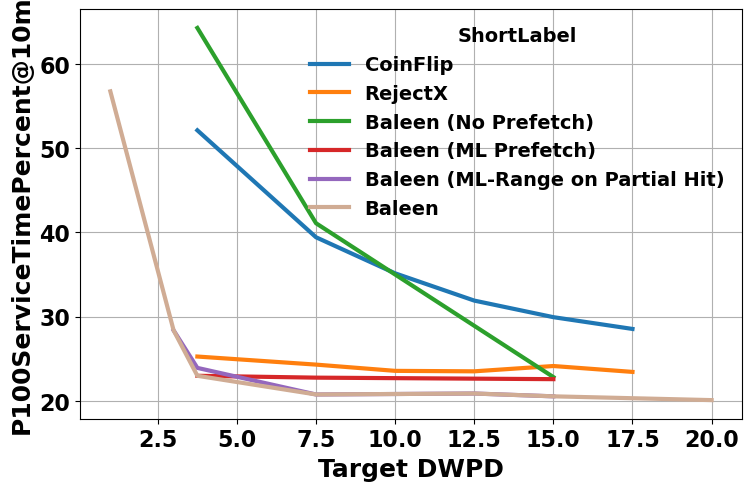

In [13]:
# filter_df(dfs_01["exp"], {'ShortLabel': ['Baleen (ML-Range on Partial-Hit)"}
# dd = pd.concat([dfs_01["exp_"], df_star])
dd = dfs_01["exp_"]
dd = filter_df(dd, {"RegionLabel": "Region1", "CanonAP": True, "PracticalAP": True, "CanonExp": True, "Target Cache Size": ef.DEFAULT_CSIZE, "Target DWPD": [3, 3.75, 7.5, 15.0, 17.5, 10.0, 12.5],"DWPDClose": True})
sns.lineplot(data=dd, x="Target DWPD", hue="ShortLabel", y="P100ServiceTimePercent@10m", errorbar=None)
sns.lineplot(data=filter_df(df_star, {"ShortLabel": "Baleen", "RegionLabel": "Region1"}), x="Target DWPD", hue="ShortLabel", y="P100ServiceTimePercent@10m", errorbar=None, palette='pink')

In [12]:
# dd.groupby("Target DWPD")["Target DWPD"].count()

In [14]:
df_star['ShortLabel'].value_counts()

CoinFlip*    546
RejectX*     457
Baleen       419
Name: ShortLabel, dtype: int64

In [15]:
df_01.groupby('Target DWPD')['Target DWPD'].count()

Target DWPD
3.75     247
7.50     331
10.00     93
12.50    174
15.00    219
17.50     88
20.00    300
Name: Target DWPD, dtype: int64

In [16]:
dfs_01["exp"]["ShortLabel"].unique()

array(['CoinFlip', 'RejectX', 'CoinFlip (All on Partial Hit)',
       'RejectX (OPT Prefetch)', 'CoinFlip (OPT Prefetch)',
       'CoinFlip (ML Prefetch)', 'RejectX (All on Partial Hit)',
       'RejectX (ML Prefetch)', 'OfflineAnalysis (OPT Prefetch)',
       'OfflineAnalysis (No prefetching)', 'OPT AP (ML Prefetch)',
       'OPT AP (OPT Prefetch)', 'OPT AP (All on Partial Hit)',
       'OPT AP (No Prefetch)', 'Baleen (No Prefetch)',
       'Baleen (OPT Prefetch)', 'Baleen (All on Partial Hit)',
       'Baleen (ML Prefetch)', 'OPT AP (ML-Range on Partial Hit)',
       'RejectX (ML-Range on Partial Hit)',
       'CoinFlip (ML-Range on Partial Hit)',
       'Baleen (ML-Range on Partial Hit)',
       'OPT AP (ML-Range on Every Miss)',
       'OPT AP (ML-Range on OPT-Ep-Start)',
       'RejectX (ML-Range on Every Miss)',
       'CoinFlip (ML-Range on Every Miss)',
       'CoinFlip (ML-Range on OPT-Ep-Start)',
       'RejectX (ML-Range on OPT-Ep-Start)',
       'Baleen (ML-Range on Every M

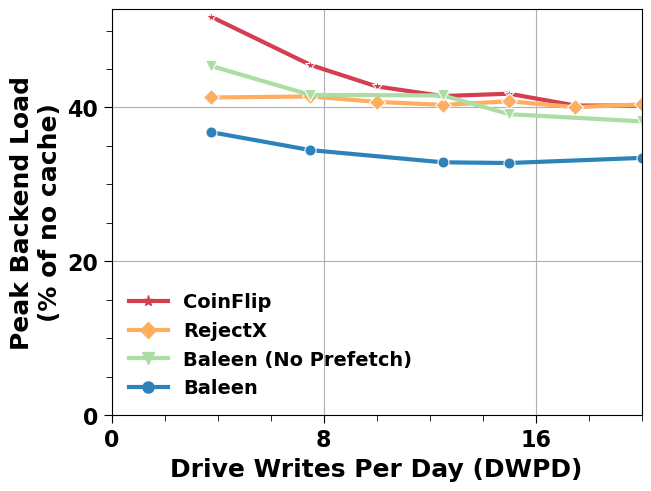

In [17]:
#df_ = df_1
x = 'Target DWPD'
y = 'P100ServiceTimePercent@10m'
#y = 'P99ServiceTimePercent@10m'
#y = 'P100ServiceTimeUtil@10m'
hue = 'ShortLabel'
dff = df_01f

plt.figure(figsize=(6.4, 4.8))
ax = plt.gca()
#ax.set_title("Average")
sns.lineplot(data=dff, x=x, y=y, **get_kwargs(dff, y, hue=hue), ax=ax, errorbar=None)
# ax.axvline(.4, ls=':', c="black", label="400GB")
postsubplot_wr(ax, 0)
ax.set_ylabel(nice_ylabel(y))
plt.legend(title=None)
plt.ylim(0, None)
plt.xlim(0, 20)
ax.set_xlabel('Drive Writes Per Day (DWPD)')
savefig("summary", "peak-st-ratio_wr")

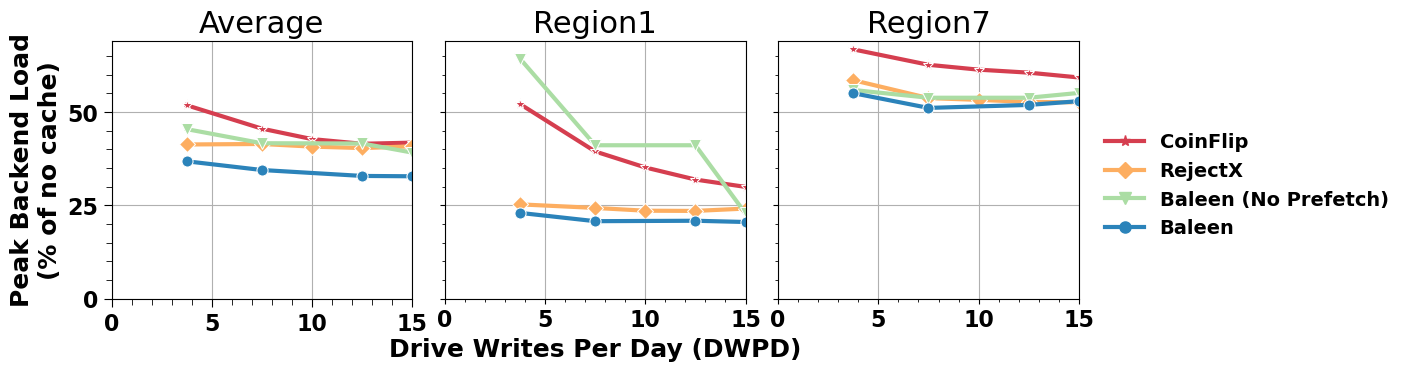

In [18]:
#df_ = df_1
x = 'Target DWPD'
y = 'P100ServiceTimePercent@10m'
#y = 'P99ServiceTimePercent@10m'
#y = 'P100ServiceTimeUtil@10m'
hue = 'ShortLabel'
dff = df_01f

fig, ax = plt.subplots(
    nrows=1,
    ncols=3,
    sharex=True,
    sharey=True,
    figsize=(7 * 2.5*.8, 3 * 1.5*.8),
    layout="constrained",
)
ax = plt.subplot(1, 3, 1)
ax.set_title("Average")
sns.lineplot(data=dff, x=x, y=y, **get_kwargs(dff, y, hue=hue), ax=ax, errorbar=None)
#ax.set_xlabel('DWPD')
postsubplot_wr(ax, 0)
ax.set_ylabel(nice_ylabel(y))


ax.get_legend().remove()

ax = plt.subplot(1, 3, 2)
dfsel = filter_df(dff, {'Region': 'Region1'})
ax.set_title(maps.region_labels['Region1'])
sns.lineplot(data=dfsel, x=x, y=y, **get_kwargs(dfsel, y, hue=hue), ax=ax, errorbar=None)
ax.set_xlabel('Drive Writes Per Day (DWPD)')
ax.get_legend().remove()

ax = plt.subplot(1, 3, 3)
dfsel = filter_df(dff, {'Region': 'Region7'})
ax.set_title(maps.region_labels['Region7'])
sns.lineplot(data=dfsel, x=x, y=y, **get_kwargs(dfsel, y, hue=hue), ax=ax, errorbar=None)
ax.set_xlabel('')
ax.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()

plt.ylim(0, None)
plt.xlim(0, 15)
#fig.supxlabel("Drive Writes Per Day (DWPD)")
fig.legend(handles, labels, title=None, loc='outside center right')
savefig("wr", "avg-1-7_peak-st-ratio")

/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/users/dlwong/apps/micromamba/

(0.0, 15.0)

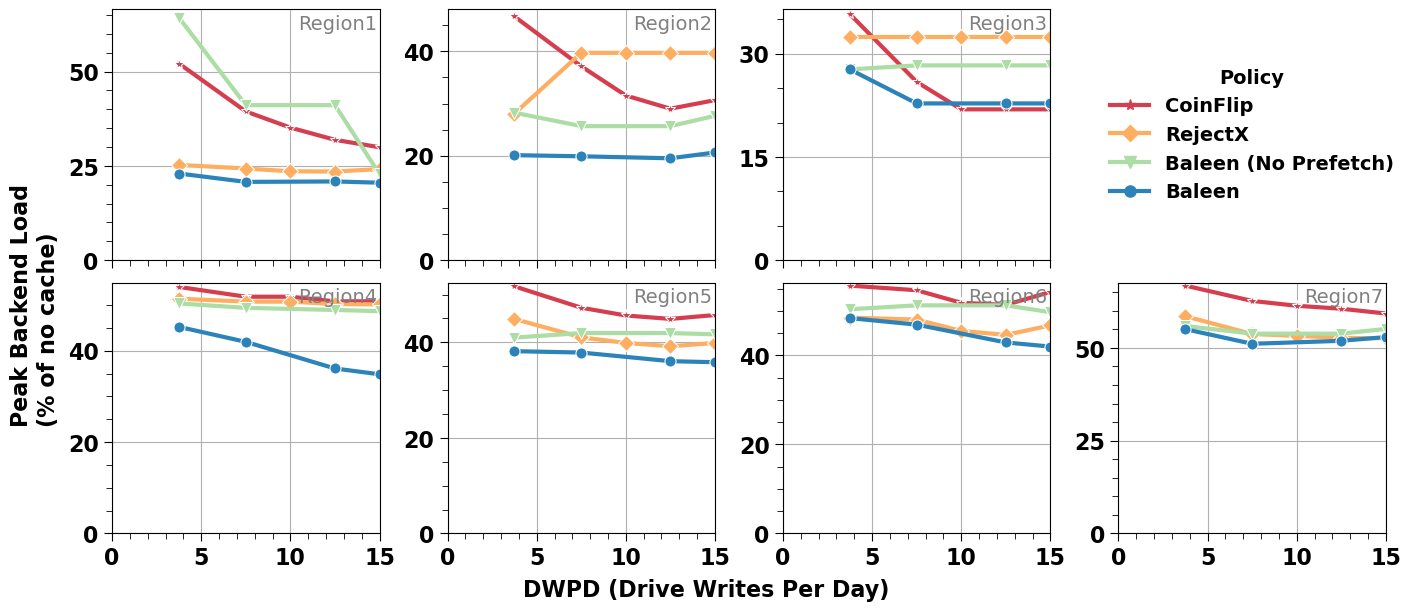

In [19]:
plot_wrs_grid(df=df_01f, y=y, hue="ShortLabel", x="Target DWPD")
plt.xlim(0, 15)

In [20]:
df_01 = filter_df(
    dfs_01["exp"],
    {
        "DWPDClose": True,
        "PracticalAP": True,
        # "SampleRatio": 1,
        "ShortLabel": [
            "CoinFlip",
            "RejectX",
            "Baleen (No Prefetch)",
            "Baleen (All on Partial Hit)",
            "Baleen (ML Prefetch)",
        ],
        #3.75,
        # "Target DWPD": [1, 7.5, 15.0, 20.0, 3.0, 17.5, 10.0, 12.5],
    },
)



/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/users/dlwong/apps/micromamba/envs/cachelib-py-3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/users/dlwong/apps/micromamba/

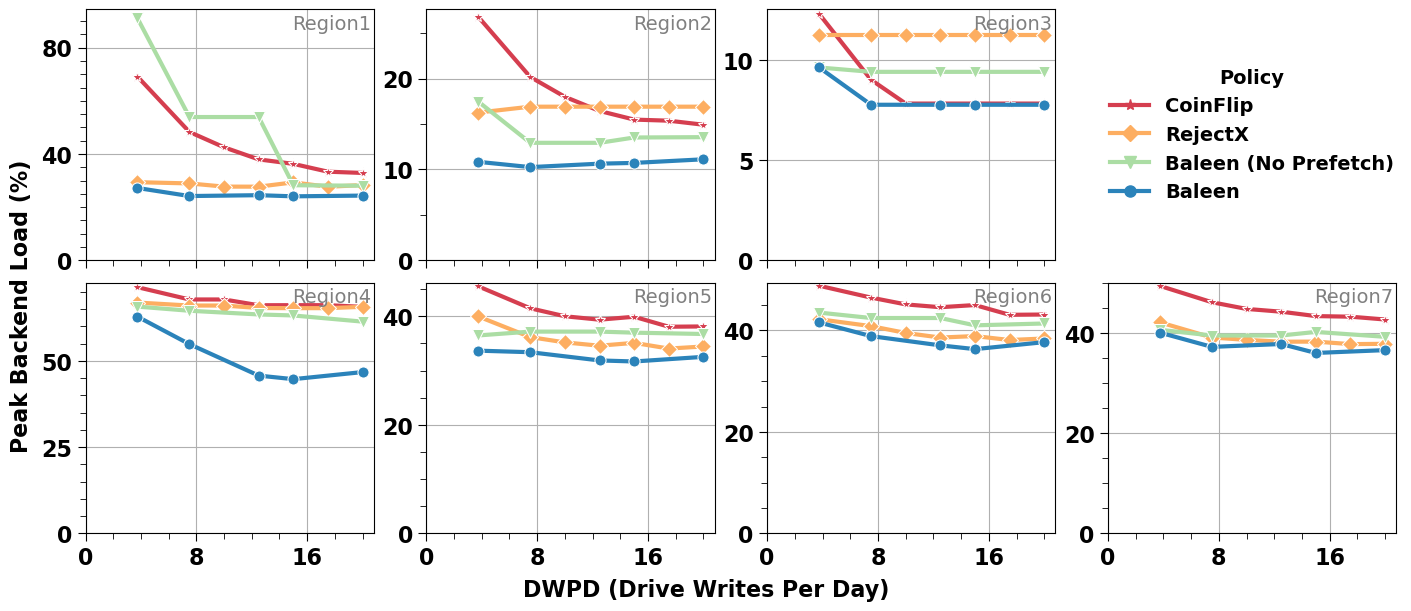

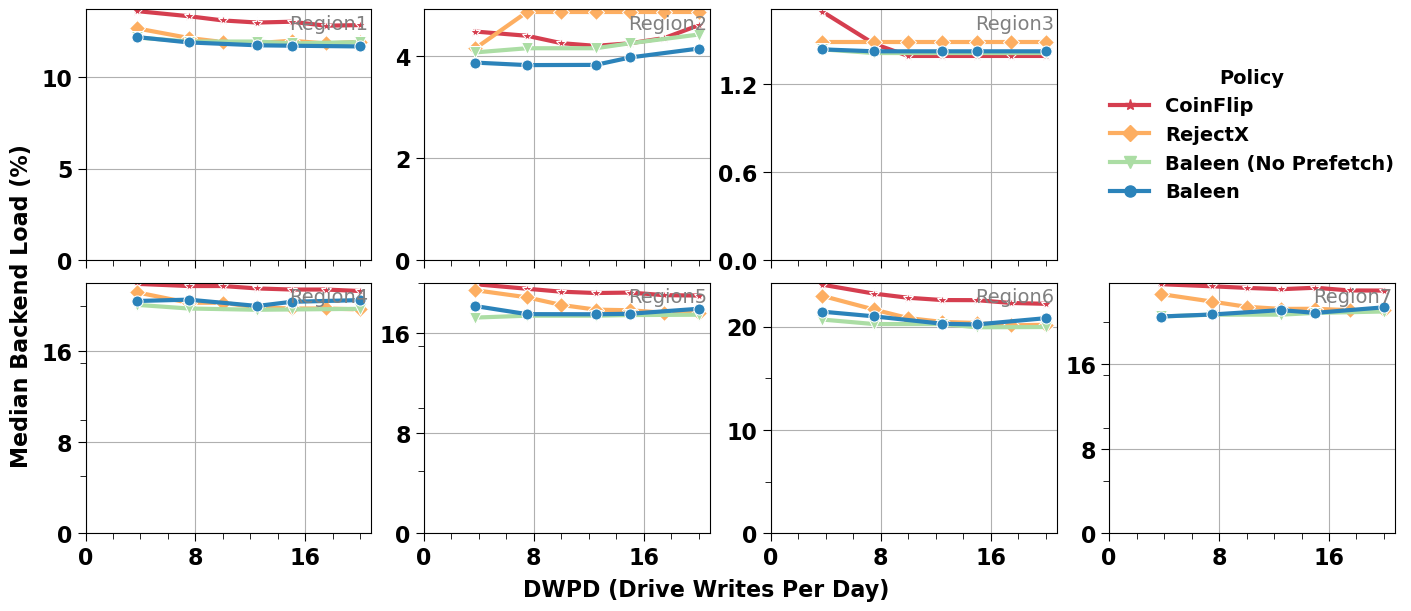

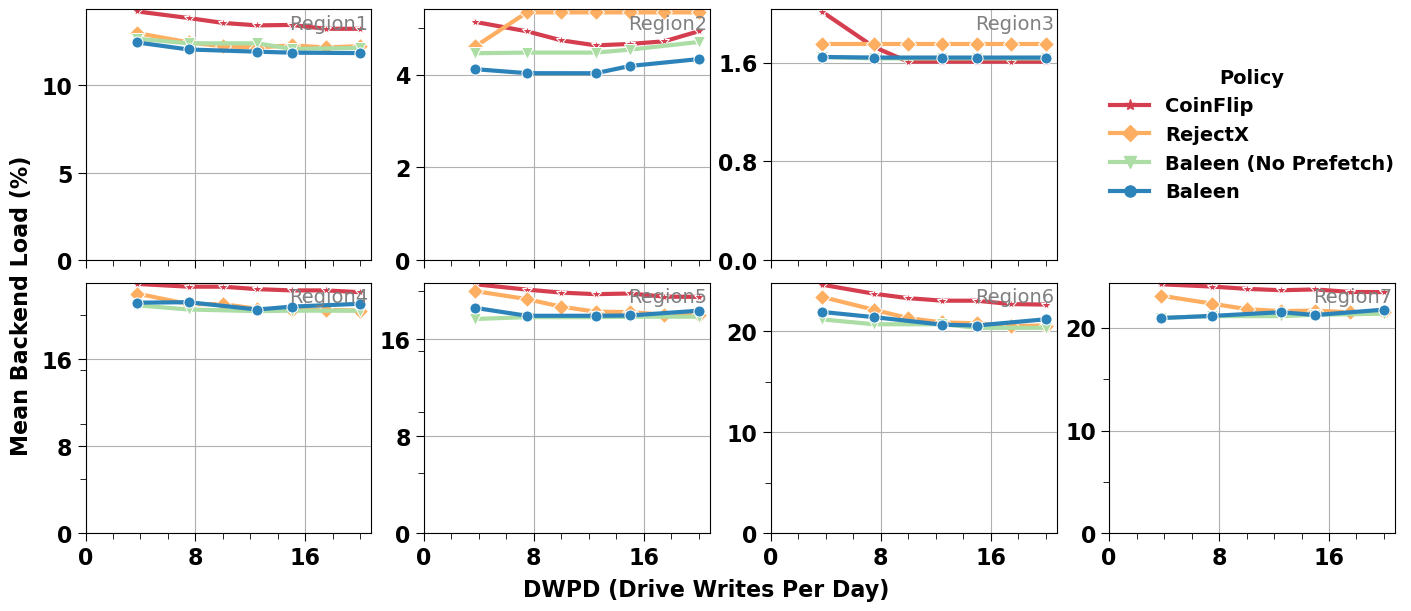

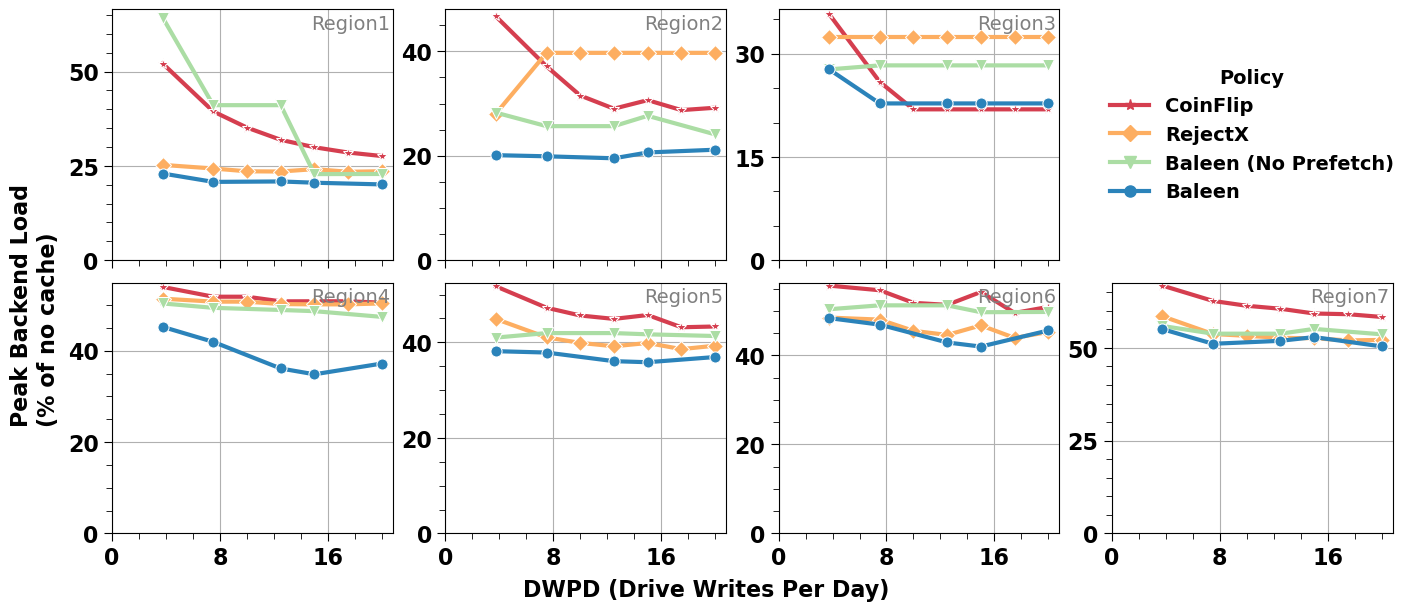

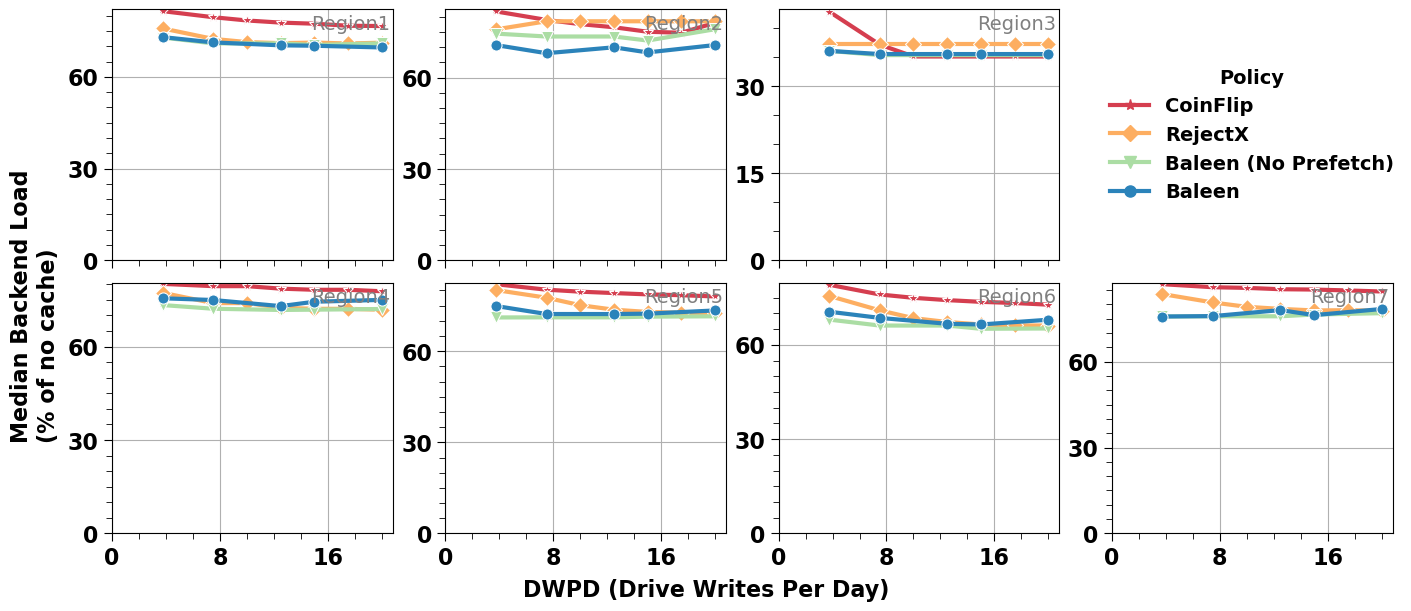

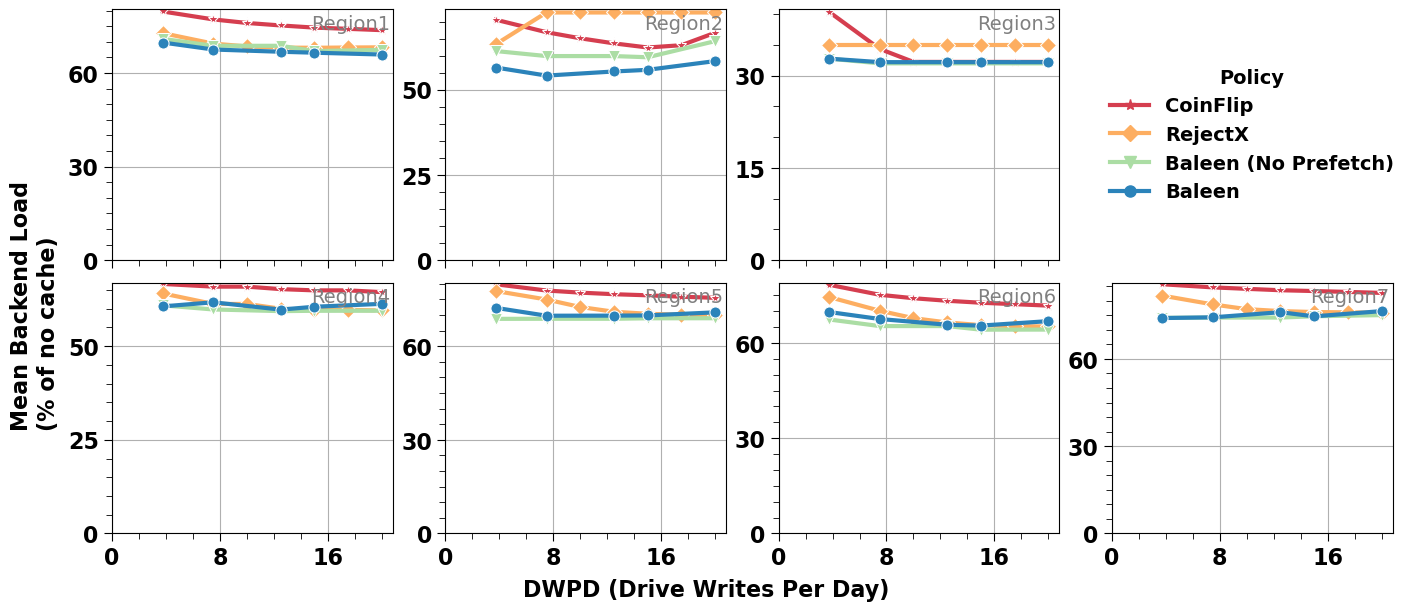

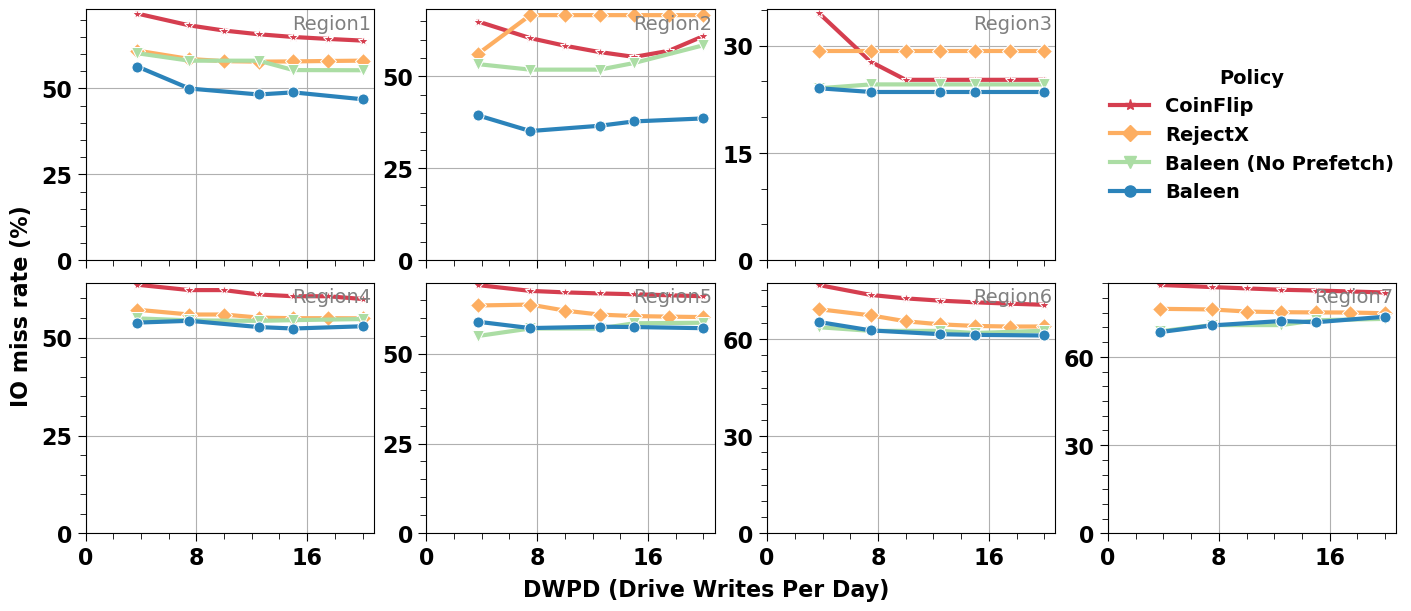

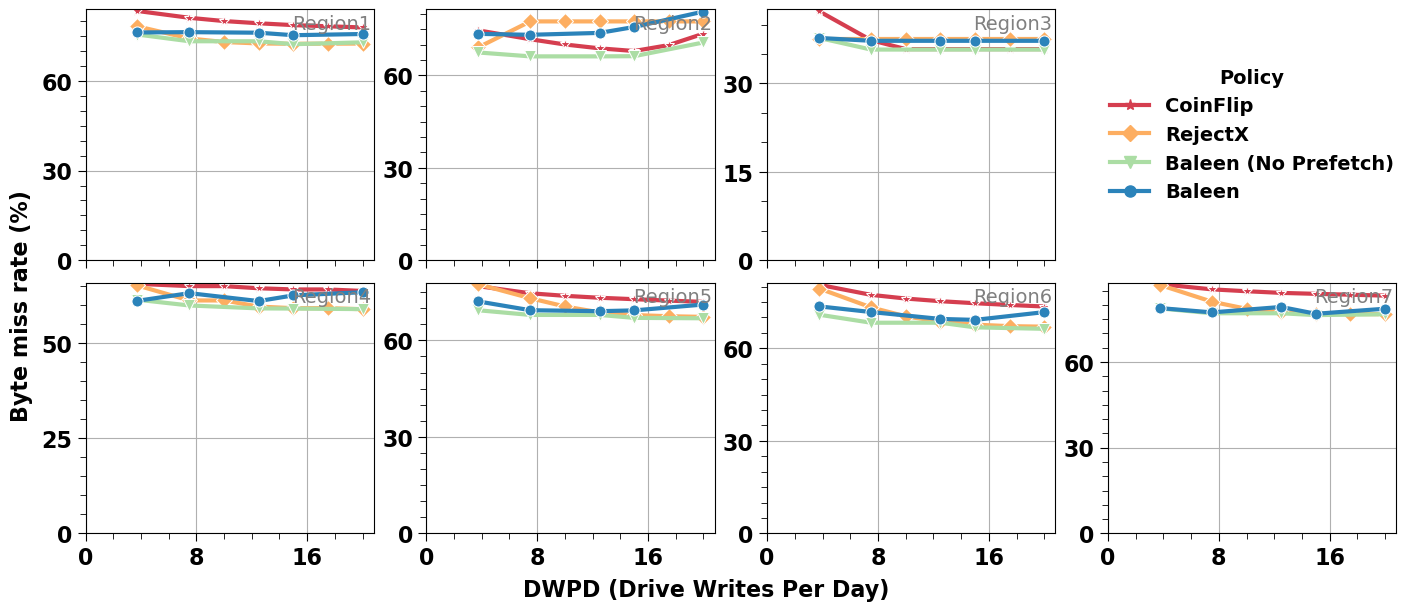

In [21]:
for k, v in figlabels.items():
    plot_wrs_grid(df=df_01f, y=v, hue="ShortLabel")#, x="Target Write Rate")
    savefig("wr", f"{k}-01")